In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [21]:
df = pd.read_csv('merged_file_insta.csv')

In [22]:
to_drop = ['image_id', 'Account', 'User Name', 'Post Created', 'Post Created Date', 'Post Created Time', 'Type', 'Likes', 'Comments', 'Views', 'Like and View Counts Disabled', 'URL', 'Link', 'Photo', 'Title', 'Sponsor Id', 'Sponsor Name', 'Overperforming Score'  ]


df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,True,True,True,False,1,False,False,False,False,cyan,...,46,HIGH,0,0,0,0,0,1,0,0
1,False,True,True,True,2,False,False,False,False,green,...,31,HIGH,0,0,0,0,0,1,0,0
2,False,True,True,False,1,False,False,False,False,grey,...,34,HIGH,0,1,0,0,0,0,0,0
3,True,True,True,False,1,False,False,False,True,grey,...,44,HIGH,0,1,0,0,0,0,0,0
4,True,True,False,True,1,False,False,False,False,cyan,...,58,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,True,True,True,True,2,False,False,False,False,brown,...,22,HIGH,0,1,0,0,0,1,0,0
1550,True,True,True,True,2,False,False,False,False,grey,...,103,HIGH,0,0,0,0,0,1,0,0
1551,False,True,True,True,2,True,False,False,False,grey,...,38,HIGH,0,1,0,0,1,1,0,0
1552,True,True,True,True,2,False,False,False,False,brown,...,52,HIGH,0,1,0,0,0,1,1,0


In [23]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    
    df['LOGO'] = df['LOGO'].astype('bool')
    df['ANGRY'] = df['ANGRY'].astype('bool')
    df['CALM'] = df['CALM'].astype('bool')
    df['CONFUSED'] = df['CONFUSED'].astype('bool')
    df['DISGUSTED'] = df['DISGUSTED'].astype('bool')
    df['FEAR'] = df['FEAR'].astype('bool')
    df['HAPPY'] = df['HAPPY'].astype('bool')
    df['SAD'] = df['SAD'].astype('bool')
    df['SURPRISED'] = df['SURPRISED'].astype('bool')
    return df

In [24]:
df = change_types(df)

In [25]:
df.dtypes

Child                    int64
Smile                    int64
Female                   int64
Male                     int64
PeopleNumber             int64
Text                     int64
close_up                 int64
Indoors                  int64
Outdoors                 int64
dominantColor           object
LOGO                      bool
Followers at Posting     int64
Total Interactions       int64
Contrast                object
ANGRY                     bool
CALM                      bool
CONFUSED                  bool
DISGUSTED                 bool
FEAR                      bool
HAPPY                     bool
SAD                       bool
SURPRISED                 bool
dtype: object

In [26]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,Followers at Posting,Total Interactions
count,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,3503589.1,10583.8
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,3881097.4,17427.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24423.0,101.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1274288.0,2576.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,7626483.2,17840.8
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9314330.0,283074.0


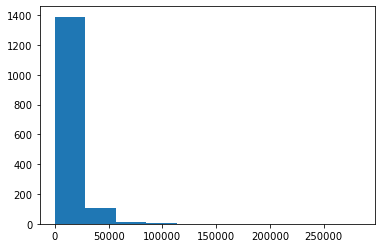

In [27]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [31]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.99)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [32]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,Followers at Posting,Total Interactions
count,1504.0,1504.0,1504.0,1504.0,1504.0,1504.0,1504.0,1504.0,1504.0,1504.0,1504.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,3451491.8,9444.6
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,3867823.0,12060.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24421.0,99.5
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1262633.0,2467.5
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,7597534.2,17624.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9314330.0,62735.0


In [34]:
new_df[new_df['Total Interactions']>10000].count()

Child                   587
Smile                   587
Female                  587
Male                    587
PeopleNumber            587
Text                    587
close_up                587
Indoors                 587
Outdoors                587
dominantColor           587
LOGO                    587
Followers at Posting    587
Total Interactions      587
Contrast                587
ANGRY                   587
CALM                    587
CONFUSED                587
DISGUSTED               587
FEAR                    587
HAPPY                   587
SAD                     587
SURPRISED               587
dtype: int64

In [35]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

0        4.593569
1        3.093195
2        3.393552
3        4.390779
4        5.781499
          ...    
1549     4.531411
1550    21.638655
1551     7.973143
1552    10.924370
1553     5.042017
Length: 1504, dtype: float64

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1504.000000
mean        4.041362
std         4.901467
min         0.422789
25%         2.150955
50%         2.986857
75%         4.385108
max       139.164638
dtype: float64

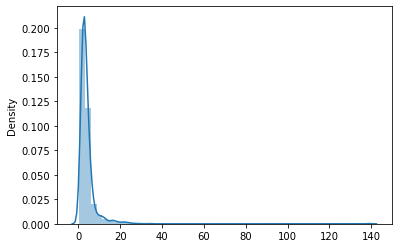

In [36]:
sns.distplot(y)
y.describe()

In [37]:
y[y<y.mean()].count()

1061

In [38]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,True,HIGH,False,False,False,False,False,True,False,False
1,0,1,1,1,2,0,0,0,0,green,True,HIGH,False,False,False,False,False,True,False,False
2,0,1,1,0,1,0,0,0,0,grey,True,HIGH,False,True,False,False,False,False,False,False
3,1,1,1,0,1,0,0,0,1,grey,True,HIGH,False,True,False,False,False,False,False,False
4,1,1,0,1,1,0,0,0,0,cyan,True,HIGH,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,brown,False,HIGH,False,True,False,False,False,True,False,False
1550,1,1,1,1,2,0,0,0,0,grey,False,HIGH,False,False,False,False,False,True,False,False
1551,0,1,1,1,2,1,0,0,0,grey,False,HIGH,False,True,False,False,True,True,False,False
1552,1,1,1,1,2,0,0,0,0,brown,False,HIGH,False,True,False,False,False,True,True,False


In [40]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,1,2,0,0,0,0,True,...,1,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,1,0,0,0,1,True,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,1,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
1550,1,1,1,1,2,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
1551,0,1,1,1,2,1,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
1552,1,1,1,1,2,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# y = (y - y.min())/(y.max() - y.min())

In [42]:
y_new = []

for i in y:
    if i<y.mean():
        y_new.append('low')
    else:
        y_new.append('high')

In [43]:
print(y_new.count('high'))
print(y_new.count('low'))

443
1061


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42, stratify=y_new)

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7308970099667774

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_new, cv=5) # cv --> 
scores.mean()

0.702126245847176

In [47]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
# print(metrics.f1_score(y_test, y_pred, labels=['low', 'high']))
print(metrics.confusion_matrix(y_test, y_pred))

[[ 50  39]
 [ 32 180]]


In [48]:
scores = cross_val_score(clf, X, y_new, cv=10)  
scores.mean()

0.7347637969094922

In [49]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.6943521594684385

In [50]:
scores = cross_val_score(neigh, X, y_new, cv=10) # cv --> 
scores.mean()

0.6542516556291391

In [51]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7740863787375415

In [52]:
scores = cross_val_score(svc, X, y_new, cv=10) 
scores.mean()

0.762737306843267

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7541528239202658

In [54]:
scores = cross_val_score(lr, X, y_new, cv=10) # cv --> 
scores.mean()

0.7321015452538632

In [55]:
for imp, name in zip(clf.feature_importances_, clf.feature_names_in_):
    print(name, imp)

Child 0.03
Smile 0.06
Female 0.08
Male 0.09
PeopleNumber 0.19
Text 0.03
close_up 0.03
Indoors 0.02
Outdoors 0.02
LOGO 0.01
ANGRY 0.0
CALM 0.04
CONFUSED 0.03
DISGUSTED 0.01
FEAR 0.04
HAPPY 0.05
SAD 0.03
SURPRISED 0.02
dominantColor_blue 0.03
dominantColor_brown 0.0
dominantColor_cyan 0.01
dominantColor_green 0.03
dominantColor_grey 0.01
dominantColor_orange 0.01
dominantColor_pink 0.02
dominantColor_purple 0.02
dominantColor_red 0.01
dominantColor_white 0.02
dominantColor_yellow 0.02
Contrast_HIGH 0.01
Contrast_LOW 0.03


In [56]:
# Sorted feature importances
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

PeopleNumber            0.19
Male                    0.09
Female                  0.08
Smile                   0.06
HAPPY                   0.05
CALM                    0.04
FEAR                    0.04
dominantColor_green     0.03
dominantColor_blue      0.03
SAD                     0.03
CONFUSED                0.03
Child                   0.03
Text                    0.03
close_up                0.03
Contrast_LOW            0.03
Outdoors                0.02
Indoors                 0.02
SURPRISED               0.02
dominantColor_pink      0.02
dominantColor_purple    0.02
dominantColor_white     0.02
dominantColor_yellow    0.02
LOGO                    0.01
dominantColor_cyan      0.01
DISGUSTED               0.01
dominantColor_grey      0.01
dominantColor_orange    0.01
dominantColor_red       0.01
Contrast_HIGH           0.01
dominantColor_brown     0.00
ANGRY                   0.00
dtype: float64

## Balance dataset

In [57]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [58]:
X['Targets']=y_new

In [59]:
X = downsample(X, 'Targets')
y_new = X['Targets']

In [60]:
X = X.drop('Targets', axis=1)

In [61]:
X.shape

(886, 31)

In [62]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,0,0,0,0,0,0,0,1,True,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,1,0,0,0,False,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,0,1,0,0,0,1,False,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,False,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,1,1,0,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
882,0,1,1,0,1,1,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
883,0,0,0,0,0,1,0,0,0,True,...,0,0,0,0,1,0,0,0,0,1
884,0,1,1,0,2,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [64]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.6460674157303371
[[54 40]
 [23 61]]


In [65]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

[0.58988764 0.64971751 0.6779661  0.66666667 0.59887006]


0.6366215958864978

In [66]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.7247191011235955
[[60 34]
 [15 69]]


In [67]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

0.6975496730781439

In [68]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.5898876404494382

In [69]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

0.5936964387735669

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7247191011235955

In [71]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

0.715603377134514

In [72]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7191011235955056

In [73]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

0.7189932076429887

In [74]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7191011235955056

In [75]:
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

PeopleNumber            0.13
Male                    0.10
Female                  0.09
Contrast_HIGH           0.05
Child                   0.04
SAD                     0.04
Smile                   0.04
Text                    0.03
close_up                0.03
Outdoors                0.03
LOGO                    0.03
dominantColor_blue      0.03
CALM                    0.03
dominantColor_white     0.03
dominantColor_purple    0.03
dominantColor_grey      0.02
dominantColor_yellow    0.02
dominantColor_red       0.02
dominantColor_cyan      0.02
dominantColor_green     0.02
HAPPY                   0.02
SURPRISED               0.02
FEAR                    0.02
DISGUSTED               0.02
CONFUSED                0.02
ANGRY                   0.02
Indoors                 0.02
dominantColor_brown     0.01
dominantColor_orange    0.01
dominantColor_pink      0.01
Contrast_LOW            0.00
dtype: float64

## Oversampling

In [93]:
# Oversampling
indices = [i for i, x in enumerate(y_new) if x == "high"]
missing = 618
high_df = pd.DataFrame(columns=new_df.columns)
for i in range(missing):
    i = random.choice(indices)
    ap = new_df.iloc[i]
    high_df = high_df.append(ap)
high_df.reset_index(drop=True)

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,1,0,0,0,brown,...,593,HIGH,False,False,False,False,False,True,False,False
1,0,1,1,0,1,0,0,1,0,brown,...,756,HIGH,False,False,False,False,False,True,False,False
2,0,1,1,0,1,0,0,0,0,grey,...,520,HIGH,False,False,False,False,False,True,False,False
3,0,1,0,1,1,0,0,0,0,grey,...,54,HIGH,False,False,False,False,False,True,False,False
4,1,1,1,0,1,0,0,0,0,cyan,...,35,HIGH,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,1,1,1,0,2,0,0,0,0,brown,...,31,HIGH,False,True,False,False,False,False,True,False
614,1,1,1,1,2,0,0,0,0,grey,...,1503,HIGH,False,False,False,False,False,True,False,False
615,0,0,0,0,0,0,0,0,0,cyan,...,19,HIGH,False,False,False,False,False,False,False,False
616,0,0,0,0,0,1,0,0,0,blue,...,259,LOW,False,False,False,False,False,False,False,False


In [94]:
upsampled = new_df.append(high_df)
upsampled = upsampled.sample(frac=1).reset_index(drop=True)
upsampled = change_types(upsampled)

In [95]:
y = upsampled['Total Interactions']
y = (y/upsampled['Followers at Posting'])*1000
y

0       2.248432
1       5.358352
2       2.846394
3       4.493708
4       1.359065
          ...   
2117    3.057922
2118    5.688329
2119    5.203891
2120    3.399538
2121     2.59896
Length: 2122, dtype: object

In [96]:
X = pd.get_dummies(data=upsampled.drop(['Total Interactions','Followers at Posting'], axis=1))
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,1,2,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
1,1,1,1,0,1,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,0,1,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
3,1,1,0,1,2,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0,1,1,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,0,1,1,0,1,0,0,1,0,True,...,0,1,0,0,0,0,0,0,1,0
2118,1,1,1,0,2,0,0,0,0,False,...,0,0,0,0,0,1,0,0,1,0
2119,1,1,1,1,2,1,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
2120,0,0,0,0,0,0,0,0,0,True,...,1,0,0,0,0,0,0,0,1,0


In [97]:
X['Targets']=y_new
X = downsample(X, 'Targets')
y_new = X['Targets']
X = X.drop('Targets', axis=1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [99]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.5056179775280899
[[37 57]
 [31 53]]


In [100]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

[0.52247191 0.51412429 0.41242938 0.48587571 0.46327684]


0.479635624960325

In [101]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.4550561797752809
[[41 53]
 [44 40]]


In [102]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

0.4786072494128102

In [103]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.48314606741573035

In [104]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

0.5044753380308513

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.43820224719101125

In [106]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

0.4830952834380753

In [107]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5

In [108]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

0.48079096045197744

In [109]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.4887640449438202